In [100]:
# Import Labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


In [101]:
# Importing dataset
df=pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## EDA

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [103]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [104]:
for c in df:
    print(df[c].value_counts())

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64
8.03    5
8.43    5
9.57    4
8.79    4
8.44    4


In [105]:
 df.duplicated().sum()

1

In [106]:
df.drop_duplicates(inplace=True)

In [107]:
 df.duplicated().sum()

0

## Visualization

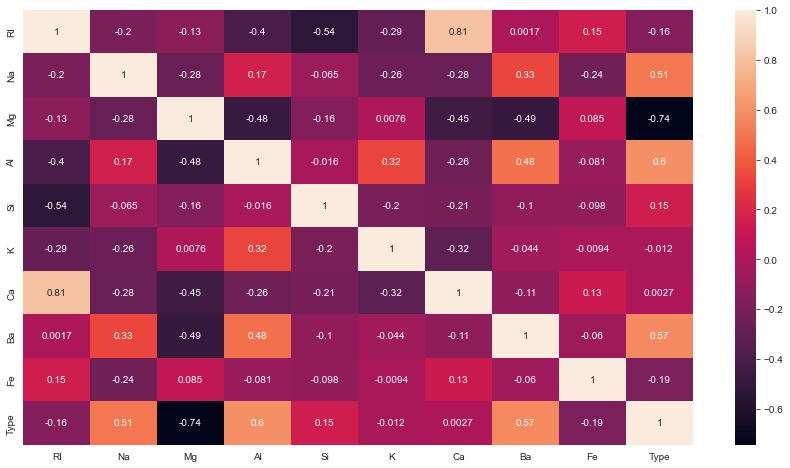

In [108]:
# Heat map correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

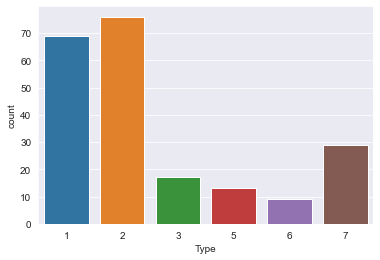

In [109]:
# Count plot on Target column
sns.countplot(df['Type'])
plt.show()

In [110]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [111]:
# Splitting data
x=df.iloc[:,0:9]
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [112]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

## Model Building

In [113]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
y_pred=knn.predict(xtest)
trainac=knn.score(xtrain,ytrain)
testac=knn.score(xtest,ytest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           1       0.63      0.86      0.73        22
           2       0.83      0.59      0.69        17
           3       0.00      0.00      0.00         7
           5       0.33      1.00      0.50         1
           6       1.00      0.50      0.67         2
           7       0.83      1.00      0.91         5

    accuracy                           0.67        54
   macro avg       0.61      0.66      0.58        54
weighted avg       0.64      0.67      0.63        54



## Hyperparameter Tuning

In [114]:
trainac=[]
testac=[]

for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

In [115]:
trainac

[1.0,
 0.8364779874213837,
 0.8301886792452831,
 0.7547169811320755,
 0.7169811320754716,
 0.7358490566037735,
 0.7358490566037735,
 0.6918238993710691,
 0.6729559748427673,
 0.6477987421383647,
 0.6540880503144654,
 0.660377358490566,
 0.660377358490566,
 0.660377358490566,
 0.6540880503144654,
 0.6540880503144654,
 0.6540880503144654,
 0.6540880503144654,
 0.6415094339622641,
 0.660377358490566]

In [116]:
testac

[0.7037037037037037,
 0.6296296296296297,
 0.6666666666666666,
 0.6481481481481481,
 0.6666666666666666,
 0.7222222222222222,
 0.6481481481481481,
 0.6851851851851852,
 0.6111111111111112,
 0.6296296296296297,
 0.6111111111111112,
 0.6481481481481481,
 0.6111111111111112,
 0.6296296296296297,
 0.6481481481481481,
 0.6296296296296297,
 0.6481481481481481,
 0.6481481481481481,
 0.6666666666666666,
 0.6666666666666666]

Text(0, 0.5, 'Accuracy')

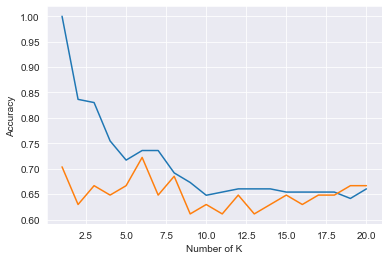

In [117]:
sns.set_style(style='darkgrid')

plt.plot(range(1,21),trainac)
plt.plot(range(1,21),testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')


## Improving Model

In [118]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(xtrain,ytrain)
y_pred=knn.predict(xtest)
trainac=knn.score(xtrain,ytrain)
testac=knn.score(xtest,ytest)

print(f"Training Accuracy {trainac}\nTesting Accuracy {testac} ")
print(classification_report(ytest,y_pred))

Training Accuracy 0.6415094339622641
Testing Accuracy 0.6666666666666666 
              precision    recall  f1-score   support

           1       0.66      0.86      0.75        22
           2       0.69      0.65      0.67        17
           3       0.00      0.00      0.00         7
           5       0.33      1.00      0.50         1
           6       0.00      0.00      0.00         2
           7       0.83      1.00      0.91         5

    accuracy                           0.67        54
   macro avg       0.42      0.59      0.47        54
weighted avg       0.57      0.67      0.61        54



In [119]:
from sklearn.metrics import accuracy_score
print(' accuracy =' ,accuracy_score(y_pred, ytest)*100)

 accuracy = 66.66666666666666


Text(92.68, 0.5, 'predicted score')

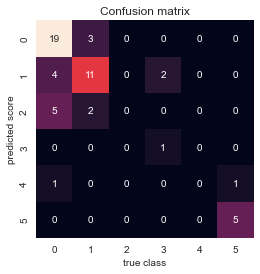

In [120]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('true class')
plt.ylabel('predicted score')